# Today's challenge: creating a new map based on census data and maps.
## First we browse the data reporter website to find something interesting.


In [1]:
import pandas as pd

In [2]:
pub_assist=pd.read_csv('pub_assist_towns.csv')

In [3]:
pub_assist.head(5)

,geoid,name,total_house,total_house_err,with_pub,with_pub_err,without_pub,without_pub_err
0,06000US4201704976,"Bedminster township, Bucks County, PA",2622,161,77,74,2545,164
1,06000US4201705616,"Bensalem township, Bucks County, PA",23646,450,838,197,22808,517
2,06000US4201708592,"Bridgeton township, Bucks County, PA",562,41,3,4,559,39
3,06000US4201708760,"Bristol borough, Bucks County, PA",3795,221,136,81,3659,234
4,06000US4201708768,"Bristol township, Bucks County, PA",19440,468,617,161,18823,465


# This is a chart of households of Bucks County towns with and without public assistance. 

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
townsmap=gpd.read_file('C:/Users/ulleryc/data-newsroom/mapping_data/tl_2017_42_cousub (1)/tl_2017_42_cousub.shp')

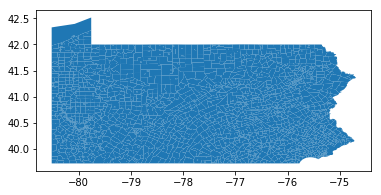

In [6]:
townsmap.plot()

# Alright, so now we have our maps of towns, and our dataframe. It's not quite ready yet though. 
# The geoid columns for both won't match because our data has that string of numbers and letter just before the state code begins. 
# In order to fix that we have to trip away the first set of digits from the pandas dataframe. 

In [7]:
pub_assist['geoid']=pub_assist['geoid'].map(lambda x: str(x)[7:])
#data['result'] = data['result'].map(lambda x: str(x)[2:])

In [8]:
pub_assist.head()

,geoid,name,total_house,total_house_err,with_pub,with_pub_err,without_pub,without_pub_err
0,4201704976,"Bedminster township, Bucks County, PA",2622,161,77,74,2545,164
1,4201705616,"Bensalem township, Bucks County, PA",23646,450,838,197,22808,517
2,4201708592,"Bridgeton township, Bucks County, PA",562,41,3,4,559,39
3,4201708760,"Bristol borough, Bucks County, PA",3795,221,136,81,3659,234
4,4201708768,"Bristol township, Bucks County, PA",19440,468,617,161,18823,465


In [9]:
townsmap.head()

,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CNECTAFP,NECTAFP,NCTADVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,42,011,32120,01214915,4201132120,Hamburg,Hamburg borough,21,C5,G4040,None,None,None,F,4864885,179149,+40.5562254,-075.9823565,"POLYGON ((-76.00014 40.572581, -75.99984499999..."
1,42,061,71328,01216520,4206171328,Smithfield,Smithfield township,44,T1,G4040,None,None,None,A,14251228,261805,+40.4781423,-078.0288184,"POLYGON ((-78.05559 40.489236, -78.05538399999..."
2,42,133,58888,01217304,4213358888,Penn,Penn township,44,T1,G4040,None,None,None,A,33607809,422675,+39.7993055,-076.9645540,"POLYGON ((-77.00031199999999 39.831219, -76.99..."
3,42,133,63288,01215758,4213363288,Railroad,Railroad borough,21,C5,G4040,None,None,None,F,1653144,0,+39.7596102,-076.6960733,"POLYGON ((-76.706385 39.765263, -76.706255 39...."
4,42,133,63840,01215759,4213363840,Red Lion,Red Lion borough,21,C5,G4040,None,None,None,F,3399570,0,+39.8986060,-076.6077492,"(POLYGON ((-76.621526 39.89964, -76.6191989999..."


# We also need to make sure the names of the town match. Fist thing we'll do is convert both columns to lower case. 

In [10]:
pub_assist['name']=pub_assist['name'].str.lower()
townsmap['NAMELSAD']=townsmap['NAMELSAD'].str.lower()
#df['url'] = df['url'].str.lower()

In [11]:
pub_assist.head(1)

,geoid,name,total_house,total_house_err,with_pub,with_pub_err,without_pub,without_pub_err
0,4201704976,"bedminster township, bucks county, pa",2622,161,77,74,2545,164


In [12]:
townsmap.head(1)

,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CNECTAFP,NECTAFP,NCTADVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,42,011,32120,01214915,4201132120,Hamburg,hamburg borough,21,C5,G4040,None,None,None,F,4864885,179149,+40.5562254,-075.9823565,"POLYGON ((-76.00014 40.572581, -75.99984499999..."


# Now we're getting there. For now though, our townsmap variable has more information than we actually need for our purposes. 
# Let's drop the columns we don't need and keep only the geoid, coordiantes and geometry columns. 

In [13]:
townsmap1=townsmap.drop(['STATEFP','COUNTYFP','COUSUBFP','COUSUBNS','NAME','LSAD','CLASSFP','MTFCC','CNECTAFP','NECTAFP','NCTADVFP','FUNCSTAT'],axis=1)


In [14]:
townsmap1.head()

,GEOID,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4201132120,hamburg borough,4864885,179149,+40.5562254,-075.9823565,"POLYGON ((-76.00014 40.572581, -75.99984499999..."
1,4206171328,smithfield township,14251228,261805,+40.4781423,-078.0288184,"POLYGON ((-78.05559 40.489236, -78.05538399999..."
2,4213358888,penn township,33607809,422675,+39.7993055,-076.9645540,"POLYGON ((-77.00031199999999 39.831219, -76.99..."
3,4213363288,railroad borough,1653144,0,+39.7596102,-076.6960733,"POLYGON ((-76.706385 39.765263, -76.706255 39...."
4,4213363840,red lion borough,3399570,0,+39.8986060,-076.6077492,"(POLYGON ((-76.621526 39.89964, -76.6191989999..."


# There we go. That' looks a bit better, but we should make sure the column headers are also all lover case. 

In [15]:
townsmap1.columns=townsmap1.columns.str.lower()

In [16]:
townsmap1.head()

,geoid,namelsad,aland,awater,intptlat,intptlon,geometry
0,4201132120,hamburg borough,4864885,179149,+40.5562254,-075.9823565,"POLYGON ((-76.00014 40.572581, -75.99984499999..."
1,4206171328,smithfield township,14251228,261805,+40.4781423,-078.0288184,"POLYGON ((-78.05559 40.489236, -78.05538399999..."
2,4213358888,penn township,33607809,422675,+39.7993055,-076.9645540,"POLYGON ((-77.00031199999999 39.831219, -76.99..."
3,4213363288,railroad borough,1653144,0,+39.7596102,-076.6960733,"POLYGON ((-76.706385 39.765263, -76.706255 39...."
4,4213363840,red lion borough,3399570,0,+39.8986060,-076.6077492,"(POLYGON ((-76.621526 39.89964, -76.6191989999..."


# Also, I've made a new variable for the townsmap once I decided to drop columns. This way, if I screw up really badly, I can revert back to the original variable later. 

# Let's get back to our census dataframe, because we aren't quite ready for that one yet either. 

In [17]:
pub_assist.head()

,geoid,name,total_house,total_house_err,with_pub,with_pub_err,without_pub,without_pub_err
0,4201704976,"bedminster township, bucks county, pa",2622,161,77,74,2545,164
1,4201705616,"bensalem township, bucks county, pa",23646,450,838,197,22808,517
2,4201708592,"bridgeton township, bucks county, pa",562,41,3,4,559,39
3,4201708760,"bristol borough, bucks county, pa",3795,221,136,81,3659,234
4,4201708768,"bristol township, bucks county, pa",19440,468,617,161,18823,465


# Those town names aren't going to match the namelsad column in the geodataframe. We'll be renaming namelsad to name later, but the important thing is getting rid of all that extra data. 
# Maybe I can split the column at the commas.

In [18]:
pub_assist['name']=pub_assist['name'].str.split(',', expand=True)
pub_assist.head(1)
#data[0].str.split(',', expand=True)


,geoid,name,total_house,total_house_err,with_pub,with_pub_err,without_pub,without_pub_err
0,4201704976,bedminster township,2622,161,77,74,2545,164


# Okay, so now lets double check the data types for both frames, and then we can rename the right columns and merge the whole thing. 

In [19]:
pub_assist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 8 columns):
geoid              54 non-null object
name               54 non-null object
total_house        54 non-null int64
total_house_err    54 non-null int64
with_pub           54 non-null int64
with_pub_err       54 non-null int64
without_pub        54 non-null int64
without_pub_err    54 non-null int64
dtypes: int64(6), object(2)
memory usage: 3.5+ KB


In [20]:
townsmap1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2573 entries, 0 to 2572
Data columns (total 7 columns):
geoid       2573 non-null object
namelsad    2573 non-null object
aland       2573 non-null int64
awater      2573 non-null int64
intptlat    2573 non-null object
intptlon    2573 non-null object
geometry    2573 non-null object
dtypes: int64(2), object(5)
memory usage: 140.8+ KB


# This looks like it will work. So let's rename our namelsad column first. 

In [21]:
townsmap1.rename(columns={'namelsad':'name'},inplace=True)

In [22]:
townsmap1.head(1)

,geoid,name,aland,awater,intptlat,intptlon,geometry
0,4201132120,hamburg borough,4864885,179149,+40.5562254,-075.9823565,"POLYGON ((-76.00014 40.572581, -75.99984499999..."


In [23]:
pub_assist.head(1)

,geoid,name,total_house,total_house_err,with_pub,with_pub_err,without_pub,without_pub_err
0,4201704976,bedminster township,2622,161,77,74,2545,164


# Alright. Now, both the geoid and name columns should match up together. 
# I'm going to use pandas' merge function to pull the two together. There is one thing to keep in mind when joining a geodataframe with a pandas dataframe: keep the geodataframe on the left. Otherwise, the whole thing goes to a pandas dataframe and you can't map it out. 

In [24]:
maptest1=pd.merge(townsmap1,pub_assist,on='geoid')

In [25]:
maptest1.head(5)

,geoid,name_x,aland,awater,intptlat,intptlon,geometry,name_y,total_house,total_house_err,with_pub,with_pub_err,without_pub,without_pub_err
0,4201708768,bristol township,41150883,3169234,+40.1236377,-074.8673846,"POLYGON ((-74.914953 40.088604, -74.914748 40....",bristol township,19440,468,617,161,18823,465
1,4201712504,chalfont borough,4191670,47487,+40.2889780,-075.2095910,"POLYGON ((-75.22550199999999 40.292485, -75.22...",chalfont borough,1482,91,31,27,1451,91
2,4201719784,doylestown borough,5586406,4940,+40.3141965,-075.1276974,"POLYGON ((-75.148552 40.309532, -75.148162 40....",doylestown borough,3886,221,73,41,3813,223
3,4201720104,dublin borough,1509625,1078,+40.3769203,-075.2059483,"POLYGON ((-75.214015 40.373127, -75.213706 40....",dublin borough,896,54,6,8,890,55
4,4201733224,haycock township,50950344,3527964,+40.4721045,-075.2427174,"POLYGON ((-75.30240599999999 40.468878, -75.30...",haycock township,849,46,0,10,849,46


In [26]:
maptest1.name_x.shape

(54,)

# It looks like everything worked out here so far. Above, you'll see that I used ".shape" at the end of the code. This tells me how many entries there are in that column. Bucks County has 54 towns, so I know that geodataframe only counted towns from Bucks County in the map.  

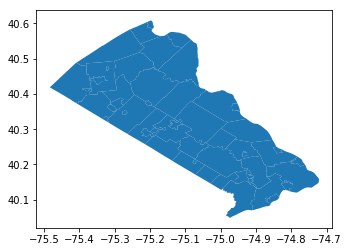

In [27]:
maptest1.plot()

# Of course, you could just print out the map to confirm. This is what our map looks like without considering any of the data above. 
# So, let's start checking that out. 

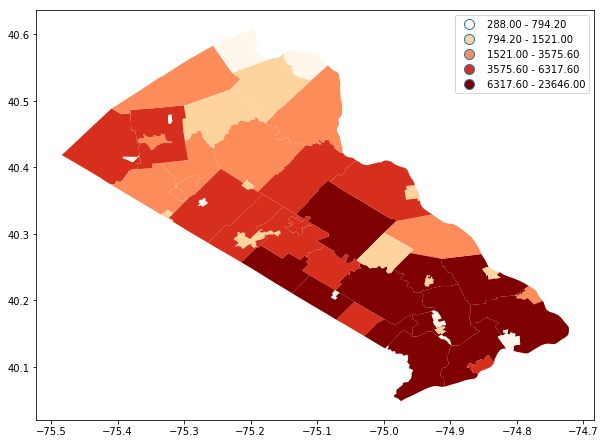

In [28]:
maptest1.plot(column='total_house',cmap='OrRd',scheme='quantiles',legend=True,figsize=(10,10))

# I had to use some kind of color scheme for this, but basically we're just looking at a map of total households in Bucks County for the ACS 5-year 2016 data. We can the lower Bucks has a lot more households in general. Now, we can see how many of those households are on some form of public assistance. 

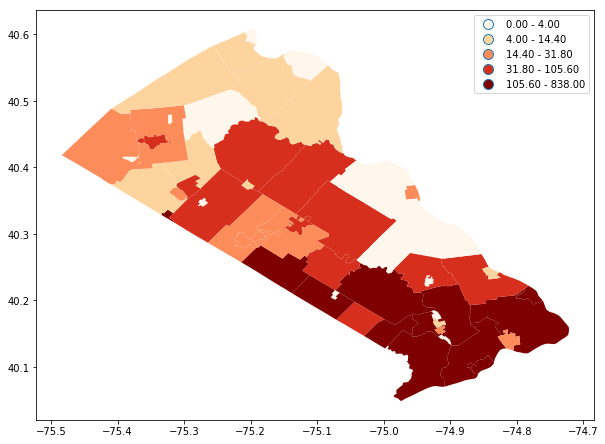

In [29]:
maptest1.plot(column='with_pub',cmap='OrRd',scheme='quantiles',legend=True,figsize=(10,10))

# It looks like there's not a lot of public assistance used in Bucks County, at least according to this map. At most, a single town can have only 838 households using some form of assistance, but we know at least one town has nearly 23,700 households.
# What I do think is interesting here are the white spots among the darkest red in the map. 
# It would seem that these three litttle boroughs that cut through Middletown are unusual areas. That's a problem though, because we know that's not accurate. 
# Take a look again out the total household map above. They aren't unusal in the area because of the small public assistance number. Those boroughs have very few households compared to the entire county. 
# What is worth looking into for this map is that area of white in central Bucks, on the eastern boarder. 
# The total household map shows those communities (Solebury, Upper Makefield and Wrightstown) in the middle ground for number of households (collectively between several hundred to several thousand homes). 
# Depsite being in that middle ground, those areas have some of the lowest number of households on some form of assistance (Upper Makefield has none). 


In [30]:
incomes=pd.read_csv('incomes_bucks.csv')


In [32]:
incomes['geoid']=incomes['geoid'].map(lambda x: str(x)[7:])

In [36]:
incomes['name']=incomes['name'].str.split(',', expand=True)

In [37]:
incomes

,geoid,name,lowest_quin,l_q_err,second_quin,s_q_err,third_quin,t_q_err,fourth_quin,f_quin_err,lower_top5,l_t5_err
0,4201704976,Bedminster township,37599,8901,54655,22871,102136,17713,143870,14809,250001,0
1,4201705616,Bensalem township,27155,1885,47582,2385,74374,2604,113142,5853,199110,12518
2,4201708592,Bridgeton township,23962,3600,41980,11617,71286,8725,103833,19142,209917,27186
3,4201708760,Bristol borough,16752,1551,33734,3244,56280,3584,87553,6544,144836,19708
4,4201708768,Bristol township,27303,2432,47450,2009,72654,3100,106602,3346,155766,9931
5,4201709816,Buckingham township,49494,5686,99955,9745,149837,10624,243529,22509,250001,0
6,4201712504,Chalfont borough,58131,5230,80429,5725,121652,16585,166500,20338,250001,0
7,4201719784,Doylestown borough,25121,6113,50821,3224,90701,5436,145250,13886,249777,36807
8,4201719792,Doylestown township,42594,3911,81148,12080,124847,12300,195144,17361,250001,0
9,4201720104,Dublin borough,25841,1898,43423,3604,70875,9281,105111,6576,183250,21128


In [39]:
maptest1

,geoid,name_x,aland,awater,intptlat,intptlon,geometry,name_y,total_house,total_house_err,with_pub,with_pub_err,without_pub,without_pub_err
0,4201708768,bristol township,41150883,3169234,+40.1236377,-074.8673846,"POLYGON ((-74.914953 40.088604, -74.914748 40....",bristol township,19440,468,617,161,18823,465
1,4201712504,chalfont borough,4191670,47487,+40.2889780,-075.2095910,"POLYGON ((-75.22550199999999 40.292485, -75.22...",chalfont borough,1482,91,31,27,1451,91
2,4201719784,doylestown borough,5586406,4940,+40.3141965,-075.1276974,"POLYGON ((-75.148552 40.309532, -75.148162 40....",doylestown borough,3886,221,73,41,3813,223
3,4201720104,dublin borough,1509625,1078,+40.3769203,-075.2059483,"POLYGON ((-75.214015 40.373127, -75.213706 40....",dublin borough,896,54,6,8,890,55
4,4201733224,haycock township,50950344,3527964,+40.4721045,-075.2427174,"POLYGON ((-75.30240599999999 40.468878, -75.30...",haycock township,849,46,0,10,849,46
5,4201736192,hulmeville borough,921987,43900,+40.1432771,-074.9069441,"POLYGON ((-74.918076 40.145724, -74.917873 40....",hulmeville borough,342,45,3,5,339,46
6,4201741392,langhorne borough,1274212,6093,+40.1774525,-074.9234165,"POLYGON ((-74.928814 40.183819, -74.9286089999...",langhorne borough,572,51,3,4,569,51
7,4201741416,langhorne manor borough,1549188,11884,+40.1659570,-074.9182532,"POLYGON ((-74.92625699999999 40.172641, -74.92...",langhorne manor borough,307,28,5,5,302,29
8,4201749120,middletown township,48926185,1101265,+40.1795056,-074.9068628,"POLYGON ((-74.957943 40.146592, -74.9577669999...",middletown township,16012,342,447,133,15565,336
9,4201751144,morrisville borough,4525745,522745,+40.2076440,-074.7802694,"POLYGON ((-74.803208 40.20755399999999, -74.80...",morrisville borough,3389,236,123,76,3266,235


In [40]:
maptest2=pd.merge(maptest1,incomes,on='geoid')

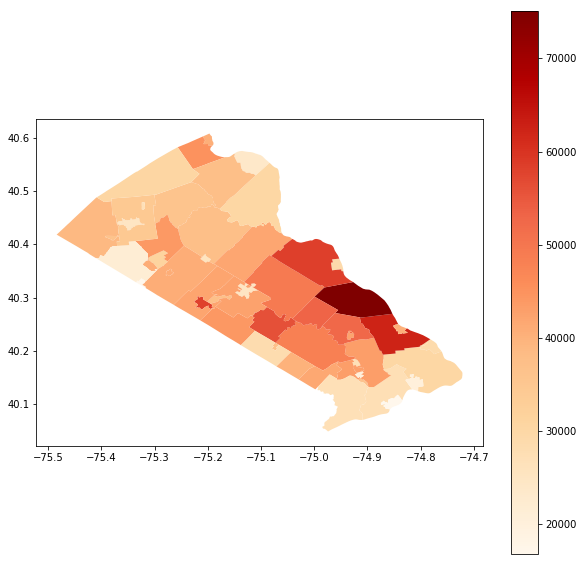

In [51]:
maptest2.plot(column='lowest_quin',cmap='OrRd',legend=True,figsize=(10,10))

# I should say at this point I'm in a bit of unfamiliar territory here. I think I know what the data is showing me, but I'm still researching.
# What I think the table above is showing is the average household incomes for the lowest fifth of earners in the county. 
# Some of that is context: for instance, that dark red area is Upper Makefield, which also had no people taking any form of government assistance. It's almost an inverted version of our public assistance map, but not entirely. 
# There are a lot of areas where the lowest fifth group of earners are making upwards of \$40,000. but some of those areas are still in our largest groups of government assistance. 
# Warwick is interesting to me for this (that's the smaller town almost in the middle of the county that's a little bit darker than its neightbors). It looks like the lowest earners in that town are making an average of nearly \$60,000 a year. While those earners are leaning towards the upper side of the lowest earners scale, Warwick is still in the fourth largest group for government assistance.  

# So, what can we learn from this? Unfortunately, not a lot. There's still a lot of data that we need to review to get anything truly meaningful out of the data. What I can say looking at this data is that few Bucks County households are receiving government assistance, some of the higher earning towns have the fewest households receiving government assistance, and that a population of higher wage earners does not necessarily mean that there will be fewer households with government assistance. 

# I know I'm missing important information like household demographics (homes with dependent children or only with people 65 or older) and the types of government assistance. There's likely other data that I might want to use in order to explore this further.
# The important lesson here (apart from some basics on geopandas) is: it's okay to start with a broad dataset and explore from there, but keep in mind you'll likely have to go through a lot more information if you want to produce any kind of truthful statement about the issue you're researching.